# PRE-PROCESSING

In [19]:
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
import nltk
import re
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# DATA COLLECTION

In [21]:
df = pd.read_csv('reviews.csv', encoding = "ISO-8859-1")

In [22]:
listing_df = pd.read_csv('listings_detail.csv', encoding = "ISO-8859-1")

In [23]:
listing_df.head()

,a,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,2.020080e+13,8/16/2020,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,...,10.0,10.0,9.0,NaN,f,2,2,0,0,0.37
1,3831,https://www.airbnb.com/rooms/3831,2.020080e+13,8/16/2020,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,https://a0.muscache.com/pictures/e49999c2-9fd5...,4869,https://www.airbnb.com/users/show/4869,...,9.0,9.0,9.0,NaN,f,1,1,0,0,4.75
2,5121,https://www.airbnb.com/rooms/5121,2.020080e+13,8/17/2020,BlissArtsSpace!,<b>The space</b><br />HELLO EVERYONE AND THANK...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,...,10.0,9.0,9.0,NaN,f,1,0,1,0,0.37
3,5136,https://www.airbnb.com/rooms/5136,2.020080e+13,8/17/2020,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,https://a0.muscache.com/pictures/25405769/42d0...,7378,https://www.airbnb.com/users/show/7378,...,10.0,8.0,10.0,NaN,f,1,1,0,0,0.01
4,5178,https://www.airbnb.com/rooms/5178,2.020080e+13,8/16/2020,Large Furnished Room Near B'wayã,Please donât expect the luxury here just a b...,"Theater district, many restaurants around here.",https://a0.muscache.com/pictures/12065/f070997...,8967,https://www.airbnb.com/users/show/8967,...,9.0,10.0,9.0,NaN,f,1,0,1,0,3.44


In [6]:
listing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46527 entries, 0 to 46526
Data columns (total 74 columns):
a                                               46527 non-null int64
listing_url                                     46527 non-null object
scrape_id                                       46527 non-null float64
last_scraped                                    46527 non-null object
name                                            46509 non-null object
description                                     45196 non-null object
neighborhood_overview                           29726 non-null object
picture_url                                     46527 non-null object
host_id                                         46527 non-null int64
host_url                                        46527 non-null object
host_name                                       46492 non-null object
host_since                                      46492 non-null object
host_location                                   4636

In [7]:
df['listing_id'].nunique()

33373

In [8]:
df['id'].nunique()

1048575

In [9]:
df['id'].value_counts()

293603327    1
488791315    1
554072021    1
147060006    1
103017765    1
            ..
107544498    1
464054193    1
99096495     1
514660932    1
477634965    1
Name: id, Length: 1048575, dtype: int64

In [10]:
#length of review
df['length']=df['comments'].str.len()
df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments,length
0,2595,17857,11/21/2009,50679,Jean,Notre sÃ©jour de trois nuits.\r\nNous avons ap...,726.0
1,2595,19176,12/5/2009,53267,Cate,Great experience.,17.0
2,2595,19760,12/10/2009,38960,Anita,I've stayed with my friend at the Midtown Cast...,471.0
3,2595,34320,4/9/2010,71130,Kai-Uwe,"We've been staying here for about 9 nights, en...",366.0
4,2595,46312,5/25/2010,117113,Alicia,We had a wonderful stay at Jennifer's charming...,155.0


<Figure size 1296x1080 with 0 Axes>

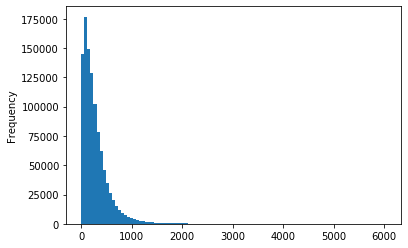

<Figure size 1296x1080 with 0 Axes>

In [11]:
#lenght of review distribution
df['length'].plot(bins=100,kind='hist')
plt.figure(figsize=[18, 15])

# PROPERTY DESCRIPTION

# 1. Lemmization

In [52]:
nltk.download('wordnet')   
# define stop words
nltk.download('stopwords') 
stop_words = set(stopwords.words("english"))

def fix_Text2(text):
    letters_only = re.sub("[^a-zA-Z]"," ", str(text))
    words=letters_only.lower().split()
    meaningful=[WordNetLemmatizer().lemmatize(word) for word in words if word not in stop_words]
    return(" ".join(meaningful))

num_resp = listing_df["description"].size   #df
clean_description_lemmization = []     #clean_

for i in range(0,num_resp):
    clean_description_lemmization.append(fix_Text2(listing_df["description"][i])) #clean_

clean_description_lemmization[0:5]    ## clean_

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PhuongAnh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PhuongAnh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['beautiful spacious skylit studio heart midtown manhattan br br stunning skylit studio bed single full bath full kitchen fireplace centrally located wifi apple tv sheet towel br br b space b br spacious ft immaculate nicely furnished designed studio br tuck ultra comfortable bed skylight fall love myriad bright light city night sky br single sized bed convertible floor mattress luxury bedding available upon request br gorgeous pyramid skylight amazing diffused natural light stunning architectural detail soaring high vaulted ceiling exposed brick wood burning fireplace floor seating area natural zafu cushion modern style mixed eclectic art antique treasure large full bath newly renovated kitchen air conditioning heat high speed wifi internet apple tv br centrally located heart midtown manhattan',
 'enjoy f top floor brownstone w wood ceramic flooring throughout roomy bdrm upgraded kitchen bathroom space unique one legal airbnbs totally private bedroom private full bathroom private eat 

In [53]:
len(clean_description_lemmization)

46527

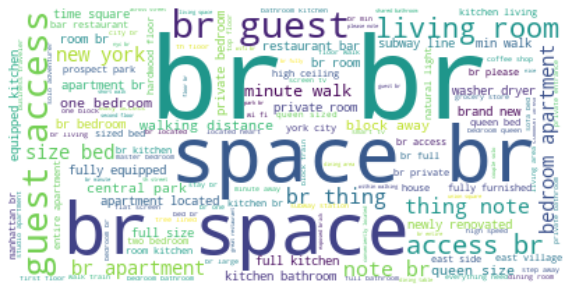

In [21]:
# word cloud
text_wc = " ".join(item for item in clean_description_lemmization)    #clean_
wordcloud = WordCloud(background_color="white").generate(text_wc)

plt.figure(figsize = (10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# 2. Text Clustering

In [54]:
tv=TfidfVectorizer() 
tv_transform=tv.fit_transform(clean_description_lemmization)
tv_transform.shape

(46527, 26839)

# Determine number of Clusters

In [24]:
from scipy.cluster.vq import kmeans,vq

In [28]:
num_clusters=7  # change the # of clusters
cluster_centers,distortion=kmeans(tv_transform.todense(),num_clusters)

# Unigram Cluster

In [51]:
tv=TfidfVectorizer(max_features=100, min_df=3) # 1.change # of features 2.maybe min_df
tv_transform=tv.fit_transform(clean_comment_lemmization)

NameError: name 'clean_comment_lemmization' is not defined

In [30]:
terms=tv.get_feature_names()
for i in range(num_clusters):
    center_terms=dict(zip(terms,list(cluster_centers[i])))
    sorted_terms=sorted(center_terms,key=center_terms.get,reverse=True)
    print(sorted_terms[:8])

['minute', 'train', 'block', 'park', 'apartment', 'walk', 'br', 'away']
['br', 'apartment', 'minute', 'space', 'access', 'train', 'block', 'walk']
['br', 'new', 'apartment', 'york', 'city', 'space', 'building', 'home']
['br', 'room', 'guest', 'space', 'access', 'apartment', 'kitchen', 'bedroom']
['place', 'close', 'br', 'location', 'park', 'neighborhood', 'train', 'restaurant']
['apartment', 'room', 'bedroom', 'studio', 'bed', 'building', 'private', 'east']
['br', 'room', 'bedroom', 'apartment', 'living', 'kitchen', 'bed', 'space']


In [31]:
columns=tv.get_feature_names() # feature names
#transform to DF
df_description=pd.DataFrame(tv_transform.toarray(),columns=columns) #df_
# insepct transformation
tv_sum=df_description.sum() #df
tv_sum.columns = ['importance']

In [32]:
tv_sum.sort_values(ascending=False).head(20)

br           18074.683170
apartment     4719.327796
room          4445.797800
bedroom       3762.192243
space         3589.959294
access        2978.174032
guest         2941.969755
kitchen       2910.443416
bed           2704.835388
private       2460.639200
bathroom      2396.496494
living        2385.212397
minute        2372.154544
one           2338.820266
floor         2322.563802
train         2309.110893
park          2255.903688
block         2211.813559
building      2195.732556
located       2173.503119
dtype: float64

In [33]:
df_sum=pd.DataFrame(tv_sum,columns=['importance']).sort_values(by='importance',ascending=False).iloc[0:14]

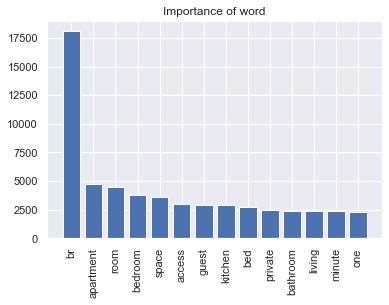

In [34]:
sns.set()
fig,ax=plt.subplots()
ax.bar(df_sum.index,df_sum.importance,label='importance')
ax.set_xticklabels(df_sum.index,rotation=90)
plt.title('Importance of word')
plt.show()

# Bigram Cluster

In [35]:
bi_tv=TfidfVectorizer(max_features=100,ngram_range=(2,2)) 
tv_transform=bi_tv.fit_transform(clean_comment_lemmization)

In [36]:
terms=bi_tv.get_feature_names()
for i in range(num_clusters):
    center_terms=dict(zip(terms,list(cluster_centers[i])))
    sorted_terms=sorted(center_terms,key=center_terms.get,reverse=True)
    print(sorted_terms[:8])

['living room', 'subway station', 'br bedroom', 'new york', 'apartment located', 'tree lined', 'br br', 'bed br']
['br br', 'apartment located', 'living room', 'room br', 'access br', 'subway station', 'br bedroom', 'tree lined']
['br br', 'min walk', 'apartment located', 'york city', 'br large', 'room br', 'br guest', 'full bathroom']
['br br', 'queen bed', 'first floor', 'room br', 'access br', 'apartment located', 'full size', 'br access']
['one bedroom', 'br please', 'br br', 'home br', 'new york', 'master bedroom', 'subway station', 'prospect park']
['apartment located', 'queen bed', 'br access', 'space br', 'block away', 'br guest', 'private bathroom', 'central park']
['br br', 'queen bed', 'br access', 'apartment located', 'high ceiling', 'full size', 'block away', 'room br']


In [37]:
columns=bi_tv.get_feature_names() # feature names
#transform to DF
Tweet=pd.DataFrame(tv_transform.toarray(),columns=columns) #df_
# insepct transformation
binigram_tv_sum=Tweet.sum() #df

In [38]:
binigram_tv_sum.sort_values(ascending=False).head(20)

br br                10806.435884
space br              4327.019471
br space              4270.495654
br guest              3555.436028
living room           3308.024336
guest access          3246.879905
access br             2944.089822
new york              2112.732988
thing note            2038.131885
note br               2038.074032
br thing              2033.881322
bedroom apartment     1978.885442
br apartment          1900.104316
size bed              1778.245698
walking distance      1698.673977
minute walk           1686.967794
central park          1642.972613
block away            1585.130825
one bedroom           1489.690626
queen size            1426.841947
dtype: float64

In [39]:
bigram_df=pd.DataFrame(binigram_tv_sum,columns=['importance']).sort_values(by='importance',ascending=False).iloc[0:14]

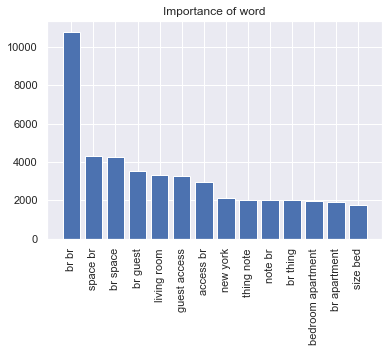

In [40]:
sns.set()
fig,ax=plt.subplots()
ax.bar(bigram_df.index,bigram_df.importance,label='importance')
ax.set_xticklabels(bigram_df.index,rotation=90)
plt.title('Importance of word')
plt.show()

# REVIEW SENTIMENT

In [21]:
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import Normalizer

In [83]:
# copy the text column into its own dataframe
review_df = df[['comments']]
review_df.head()

,comments
0,Notre sÃ©jour de trois nuits.\r\nNous avons ap...
1,Great experience.
2,I've stayed with my friend at the Midtown Cast...
3,"We've been staying here for about 9 nights, en..."
4,We had a wonderful stay at Jennifer's charming...


In [85]:
nltk.download('wordnet')   
# define stop words
nltk.download('stopwords') 
stop_words = set(stopwords.words("english"))

def fix_Text2(text):
    letters_only = re.sub("[^a-zA-Z]"," ", str(text))
    words=letters_only.lower().split()
    meaningful=[WordNetLemmatizer().lemmatize(word) for word in words if word not in stop_words]
    return(" ".join(meaningful))

num_resp = review_df["comments"].size   #df
clean_review_lemmization = []     #clean_

for i in range(0,num_resp):
    clean_review_lemmization.append(fix_Text2(review_df["comments"][i])) #clean_

clean_review_lemmization[0:5]    ## clean_

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PhuongAnh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PhuongAnh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['notre jour de trois nuits nous avon appr cier l appartement qui est tr bien situ agr able propre et bien soign c est id al pour une famille de ou personnes petits soucis en arrivant il avait personne pour nous recevoir et il manquait le savon pour la douche le liquide vaisselle nous le avon u de surlendemain il aussi le bruit du tro de ny donc une premi nuit difficile si est pa habitu jennifer est correcte le remboursement de la caution tait tr rapide part ce petits tail notre court jour c est bien pas si j ai la possibilit de revenir sur ny pour le vacances je reprendrai midtown castle jean possession ile de la r union',
 'great experience',
 'stayed friend midtown castle six day lovely place big spacious room pointy roof really make feel like staying castle location perfect step macy time square theatre district everything worked perfect key etc thank much jennifer great time new york attention th floor without lift definetely worth',
 'staying night enjoying center city never slee

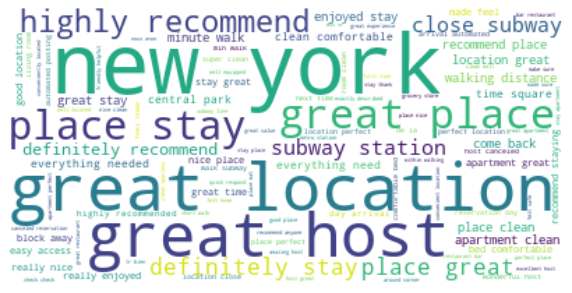

In [86]:
# word cloud
text_wc = " ".join(item for item in clean_review_lemmization)    #clean_
wordcloud = WordCloud(background_color="white").generate(text_wc)

plt.figure(figsize = (10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [26]:
review_df.comments = review_df.comments.astype(str)

C:\Users\PhuongAnh\Anaconda3\lib\site-packages\pandas\core\generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [27]:
from textblob import TextBlob

# Create a function to get the subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

# Create a function to get the polarity
def getPolarity(text):
   return  TextBlob(text).sentiment.polarity


# Create two new columns 'Subjectivity' & 'Polarity'
review_df['Subjectivity'] = review_df['comments'].apply(getSubjectivity)
review_df['Polarity'] = review_df['comments'].apply(getPolarity)

# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
review_df

C:\Users\PhuongAnh\Anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\PhuongAnh\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,comments,Subjectivity,Polarity
0,Notre sÃ©jour de trois nuits.\r\nNous avons ap...,0.000000,0.000000
1,Great experience.,0.750000,0.800000
2,I've stayed with my friend at the Midtown Cast...,0.514050,0.410124
3,"We've been staying here for about 9 nights, en...",0.460000,0.266875
4,We had a wonderful stay at Jennifer's charming...,0.700000,0.518750
...,...,...,...
1048570,Staying at Amanda and Ryan's place was like st...,0.616136,0.330114
1048571,Must stay!,0.000000,0.000000
1048572,Nir and Ariâs place was lovely and very clea...,0.731905,0.444603
1048573,Amazing space. Hosts made sure everything was ...,0.809722,0.566667


In [28]:
# Show the new dataframe with columns 'Subjectivity' & 'Polarity'
review_df

,comments,Subjectivity,Polarity
0,Notre sÃ©jour de trois nuits.\r\nNous avons ap...,0.000000,0.000000
1,Great experience.,0.750000,0.800000
2,I've stayed with my friend at the Midtown Cast...,0.514050,0.410124
3,"We've been staying here for about 9 nights, en...",0.460000,0.266875
4,We had a wonderful stay at Jennifer's charming...,0.700000,0.518750
...,...,...,...
1048570,Staying at Amanda and Ryan's place was like st...,0.616136,0.330114
1048571,Must stay!,0.000000,0.000000
1048572,Nir and Ariâs place was lovely and very clea...,0.731905,0.444603
1048573,Amazing space. Hosts made sure everything was ...,0.809722,0.566667


In [30]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def getAnalysis(score):
    if score < 0:
        return 'Negative'
    elif score == 0:
        return 'Neutral'
    else:
        return 'Positive'

review_df['Sentiment'] = review_df.Polarity.apply(getAnalysis)

review_df

C:\Users\PhuongAnh\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,comments,Subjectivity,Polarity,Sentiment
0,Notre sÃ©jour de trois nuits.\r\nNous avons ap...,0.000000,0.000000,Neutral
1,Great experience.,0.750000,0.800000,Positive
2,I've stayed with my friend at the Midtown Cast...,0.514050,0.410124,Positive
3,"We've been staying here for about 9 nights, en...",0.460000,0.266875,Positive
4,We had a wonderful stay at Jennifer's charming...,0.700000,0.518750,Positive
...,...,...,...,...
1048570,Staying at Amanda and Ryan's place was like st...,0.616136,0.330114,Positive
1048571,Must stay!,0.000000,0.000000,Neutral
1048572,Nir and Ariâs place was lovely and very clea...,0.731905,0.444603,Positive
1048573,Amazing space. Hosts made sure everything was ...,0.809722,0.566667,Positive


In [35]:
# Print the percentage of positive tweets
p_review = review_df[review_df.Sentiment == 'Positive']
p_review = p_review['comments']
p_review

round( (p_review.shape[0] / review_df.shape[0]) * 100 , 1)

89.1

In [36]:
# Print the percentage of positive tweets
n_review = review_df[review_df.Sentiment == 'Negative']
n_review = n_review['comments']
n_review

round( (n_review.shape[0] / review_df.shape[0]) * 100 , 1)

1.4

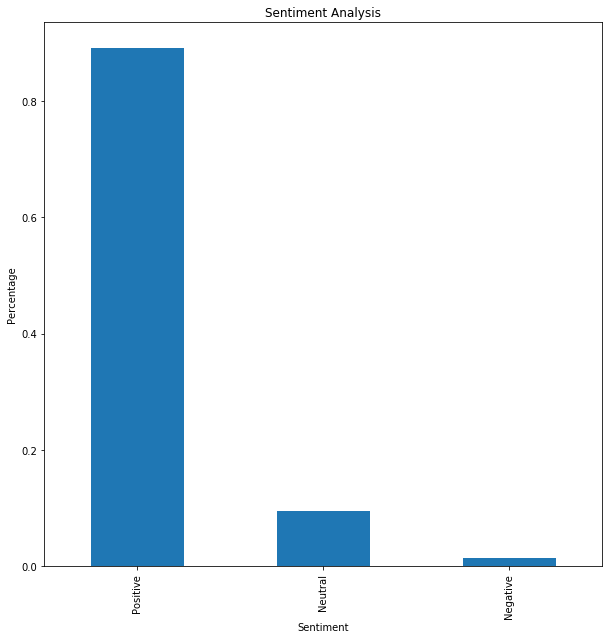

In [38]:
# Plotting and visualizing the counts
sentiment_values = review_df.Sentiment.value_counts()
plt.figure(figsize=(10,10))
(sentiment_values/review_df.shape[0]).plot(kind="bar");
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.show()

# HOST INTRODUCTION ANALYSIS

In [24]:
host_df= listing_df[['host_id','host_about']]

In [25]:
host_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46527 entries, 0 to 46526
Data columns (total 2 columns):
host_id       46527 non-null int64
host_about    28075 non-null object
dtypes: int64(1), object(1)
memory usage: 727.1+ KB


In [13]:
host_df.head()

0    A New Yorker since 2000! My passion is creatin...
1    Laid-back Native New Yorker (formerly bi-coast...
2     I am an artist(painter, filmmaker) and curato...
3    Rebecca is an artist/designer, and Henoch is i...
4    I used to work for a financial industry but no...
Name: host_about, dtype: object

In [26]:
sum(host_df.duplicated())

11128

In [29]:
host_df.drop_duplicates()

,host_id,host_about
0,2845,A New Yorker since 2000! My passion is creatin...
1,4869,Laid-back Native New Yorker (formerly bi-coast...
2,7356,"I am an artist(painter, filmmaker) and curato..."
3,7378,"Rebecca is an artist/designer, and Henoch is i..."
4,8967,I used to work for a financial industry but no...
...,...,...
46521,36370873,NaN
46522,12941925,Hello! Currently living in San Francisco. I wo...
46524,362453686,NaN
46525,4039777,NaN


In [28]:
sum(host_df.duplicated())

11128

In [30]:
host_df = host_df.dropna()

In [31]:
host_df.shape

(28075, 2)

In [32]:
host_df.tail()

,host_id,host_about
46515,361814116,We would love to host you! We are just one mes...
46517,213793805,Fashion photographer from Tlv
46519,921746,two designers who love to travel!
46522,12941925,Hello! Currently living in San Francisco. I wo...
46523,284790520,Iâm a creative professional. I truly enjoy h...


In [33]:
host_df.head()

,host_id,host_about
0,2845,A New Yorker since 2000! My passion is creatin...
1,4869,Laid-back Native New Yorker (formerly bi-coast...
2,7356,"I am an artist(painter, filmmaker) and curato..."
3,7378,"Rebecca is an artist/designer, and Henoch is i..."
4,8967,I used to work for a financial industry but no...


In [35]:
host_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28075 entries, 0 to 46523
Data columns (total 2 columns):
host_id       28075 non-null int64
host_about    28075 non-null object
dtypes: int64(1), object(1)
memory usage: 658.0+ KB


In [36]:
sum(host_df.duplicated())

7050

In [37]:
host_df.host_id.nunique()

21025

In [42]:
host_df = host_df.drop_duplicates()

In [43]:
host_df.to_csv('Airbnb-Host.csv', encoding='utf-8', index=False)

In [44]:
new_df = pd.read_csv('Airbnb-Host.csv')

In [45]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21025 entries, 0 to 21024
Data columns (total 2 columns):
host_id       21025 non-null int64
host_about    21025 non-null object
dtypes: int64(1), object(1)
memory usage: 328.6+ KB


In [46]:
nltk.download('wordnet')   
# define stop words
nltk.download('stopwords') 
stop_words = set(stopwords.words("english"))

def fix_Text2(text):
    letters_only = re.sub("[^a-zA-Z]"," ", str(text))
    words=letters_only.lower().split()
    meaningful=[WordNetLemmatizer().lemmatize(word) for word in words if word not in stop_words]
    return(" ".join(meaningful))

num_resp = new_df['host_about'].size   #df
clean_hostabout_lemmization = []     #clean_

for i in range(0,num_resp):
    clean_hostabout_lemmization.append(fix_Text2(new_df['host_about'][i])) #clean_

clean_hostabout_lemmization[0:5]    ## clean_

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\PhuongAnh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PhuongAnh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['new yorker since passion creating beautiful unique space unforgettable memory made pleasure host people around world meet new face welcome traveler sound therapy practitioner kundalini yoga meditation teacher work energy sound relaxation healing using symphonic gong singing bowl tuning fork drum voice instrument',
 'laid back native new yorker formerly bi coastal airbnb host year stay besides long time attentive airbnb host actor attorney professor group fitness instructor',
 'artist painter filmmaker curator working film industry building business extremely easy going would like laid back enjoy life kind person also ask open honest easy communicate like live life course creative people welcome',
 'rebecca artist designer henoch marketing sale event planning love travel cat board come',
 'used work financial industry work japanese food market assistant manager']

In [47]:
len(clean_hostabout_lemmization)

21025

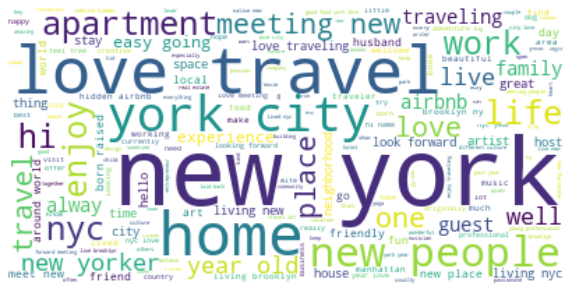

In [56]:
# word cloud
text_wc = " ".join(item for item in clean_hostabout_lemmization)    #clean_
wordcloud = WordCloud(background_color="white").generate(text_wc)

plt.figure(figsize = (10, 10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [57]:
host_tv=TfidfVectorizer() 
host_tv_transform=tv.fit_transform(clean_hostabout_lemmization)
host_tv_transform.shape

(21025, 20775)

In [58]:
from scipy.cluster.vq import kmeans,vq

In [67]:
num_clusters=6  # change the # of clusters
cluster_centers,distortion=kmeans(host_tv_transform.todense(),num_clusters)

In [68]:
host_tv=TfidfVectorizer(max_features=100, min_df=3) # 1.change # of features 2.maybe min_df
host_tv_transform=host_tv.fit_transform(clean_hostabout_lemmization)

In [69]:
terms=host_tv.get_feature_names()
for i in range(num_clusters):
    center_terms=dict(zip(terms,list(cluster_centers[i])))
    sorted_terms=sorted(center_terms,key=center_terms.get,reverse=True)
    print(sorted_terms[:8])

['brooklyn', 'ny', 'living', 'year', 'live', 'love', 'work', 'artist']
['professional', 'traveler', 'friendly', 'working', 'going', 'artist', 'easy', 'hi']
['love', 'travel', 'people', 'new', 'meeting', 'traveling', 'food', 'world']
['york', 'new', 'city', 'living', 'love', 'year', 'work', 'travel']
['home', 'like', 'guest', 'love', 'place', 'stay', 'enjoy', 'time']
['nyc', 'living', 'year', 'love', 'working', 'work', 'travel', 'live']


In [70]:
columns=host_tv.get_feature_names() # feature names
#transform to DF
df_description=pd.DataFrame(host_tv_transform.toarray(),columns=columns) #df_
# insepct transformation
host_tv_sum=df_description.sum() #df
host_tv_sum.columns = ['importance']

In [71]:
host_tv_sum.sort_values(ascending=False).head(20)

love         2089.239415
new          1935.474354
travel       1383.101115
york         1293.070266
nyc          1273.124527
living       1136.740471
year         1111.306536
city         1104.575840
work          990.255837
brooklyn      969.764326
people        967.685287
home          871.923072
traveling     837.180670
enjoy         817.005823
live          815.903374
like          808.769659
place         773.364713
time          768.352353
world         758.359870
airbnb        681.740471
dtype: float64

# Bi-gram clusters

In [72]:
host_bi_tv=TfidfVectorizer(max_features=100,ngram_range=(2,2)) 
host_bi_tv_transform=host_bi_tv.fit_transform(clean_hostabout_lemmization)

In [79]:
terms=host_bi_tv.get_feature_names()
for i in range(num_clusters):
    center_terms=dict(zip(terms,list(cluster_centers[i])))
    sorted_terms=sorted(center_terms,key=center_terms.get,reverse=True)
    print(sorted_terms[:6])

['enjoy meeting', 'new culture', 'love meet', 'york love', 'love hosting', 'love travel']
['past year', 'travel often', 'let know', 'year love', 'live new', 'brooklyn ny']
['love travel', 'travel meet', 'new yorker', 'native new', 'meet new', 'traveling meeting']
['york year', 'native new', 'explore new', 'love meet', 'love travel', 'york love']
['living working', 'love host', 'lived new', 'love travel', 'nyc year', 'spend time']
['new friend', 'love meet', 'york love', 'love travel', 'year love', 'year ago']


In [74]:
columns=host_bi_tv.get_feature_names() # feature names
#transform to DF
Host=pd.DataFrame(host_bi_tv_transform.toarray(),columns=columns) #df_
# insepct transformation
host_binigram_tv_sum=Host.sum() #df

In [80]:
host_binigram_tv_sum.sort_values(ascending=False).head(20)

new york           2061.346590
love travel        1093.234450
york city           810.821855
new people          594.635387
easy going          542.491376
year old            537.773639
new yorker          510.157655
love traveling      448.329991
living nyc          430.004549
meeting new         423.185186
living new          414.446733
living brooklyn     331.655883
look forward        330.899440
new place           329.240807
born raised         328.818648
around world        315.761089
brooklyn ny         313.093971
feel free           262.647756
meet new            262.637070
hidden airbnb       256.212844
dtype: float64

In [81]:
host_bigram_df=pd.DataFrame(host_binigram_tv_sum,columns=['importance']).sort_values(by='importance',ascending=False).iloc[0:14]

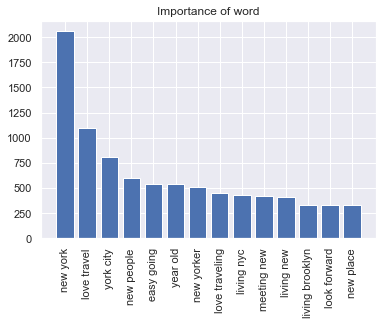

In [82]:
sns.set()
fig,ax=plt.subplots()
ax.bar(host_bigram_df.index,host_bigram_df.importance,label='importance')
ax.set_xticklabels(host_bigram_df.index,rotation=90)
plt.title('Importance of word')
plt.show()